In [1]:
import os
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
import pytorch_lightning as pl
from torch.utils.data import Dataset, random_split, DataLoader
from pytorch_lightning import Trainer

from glob import glob
import tqdm as notebook_tqdm

/Users/sofija/miniforge3/envs/torch_m1/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%load_ext lab_black

In [4]:
from typing import Any, Tuple, Optional, Callable

In [5]:
os.chdir("/Users/sofija/Ai4er/mres/tree-segmentation")
os.getcwd()

'/Users/sofija/Ai4er/mres/tree-segmentation'

In [6]:
from src.datasets import TreeSegments

In [7]:
test_read = np.loadtxt(
    "data/train/samples/Capture_Sample_22_47", delimiter=",", usecols=range(0, 3)
)

In [8]:
test_depth = test_read[:, 2].reshape(120, 160)

(-0.5, 159.5, 119.5, -0.5)

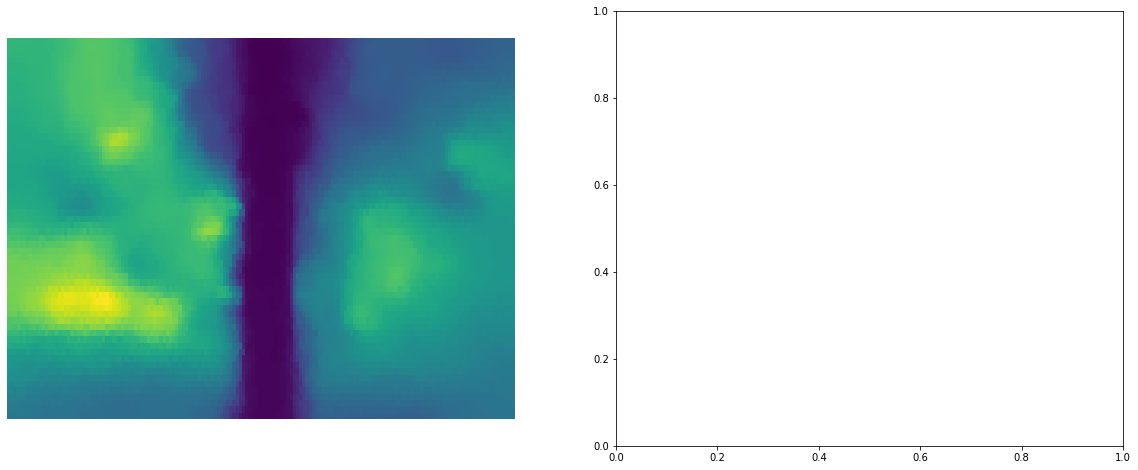

In [9]:
ncols = 2
nrows = 1

sample_n = 0

fig, axs = plt.subplots(
    nrows=1,
    ncols=ncols,
    figsize=(20, ncols * 4),
)
# permute to rearrange the rgb channel to be last
axs[0].imshow(test_depth)
axs[0].axis("off")

# msk = mask[sample_n, :, :]
# msk = torch.squeeze(msk)
# axs[1].imshow(msk)
# axs[1].axis("off")

## Calculate the mean and standard dev of the dataset

In [78]:
augs = transforms.Compose([transforms.ToTensor(), 
                           transforms.Normalize(mean = (0, 0, 0),
                              std  = (1, 1, 1)),])

In [11]:
ds = TreeSegments(
    data_dir="data/train/samples/", target_dir="data/train/segments/", train=False
)

In [13]:
len(ds)

118

In [14]:
####### COMPUTE MEAN / STD

# placeholders
psum = torch.tensor([0.0])
psum_sq = torch.tensor([0.0])

# loop through images
for i in range(len(ds)):
    psum += ds[i].sum()
    psum_sq += (ds[i] ** 2).sum()

In [15]:
# pixel count
count = len(ds) * 120 * 160

# mean and std
total_mean = psum / count
total_var = (psum_sq / count) - (total_mean**2)
total_std = torch.sqrt(total_var)

# output
print("mean: " + str(total_mean))
print("std:  " + str(total_std))

mean: tensor([3.2749])
std:  tensor([1.6713])


## Loading data from dataloaders

In [18]:
from src.datamodules import TreeDataModule

In [19]:
ds = TreeSegments(
    data_dir="data/train/samples/",
    target_dir="data/train/segments/",
    train=True,
)

In [20]:
dm = TreeDataModule(
    data_dir="data/train/samples/",
    target_dir="data/train/segments/",
)

In [21]:
dm.setup(stage="fit")

In [22]:
train_dl = dm.train_dataloader()

In [23]:
for sample in train_dl:
    img = sample[0]
    mask = sample[1]

In [24]:
img.shape

torch.Size([8, 1, 128, 160])

In [25]:
mask.shape

torch.Size([8, 1, 128, 160])

(-0.5, 159.5, 127.5, -0.5)

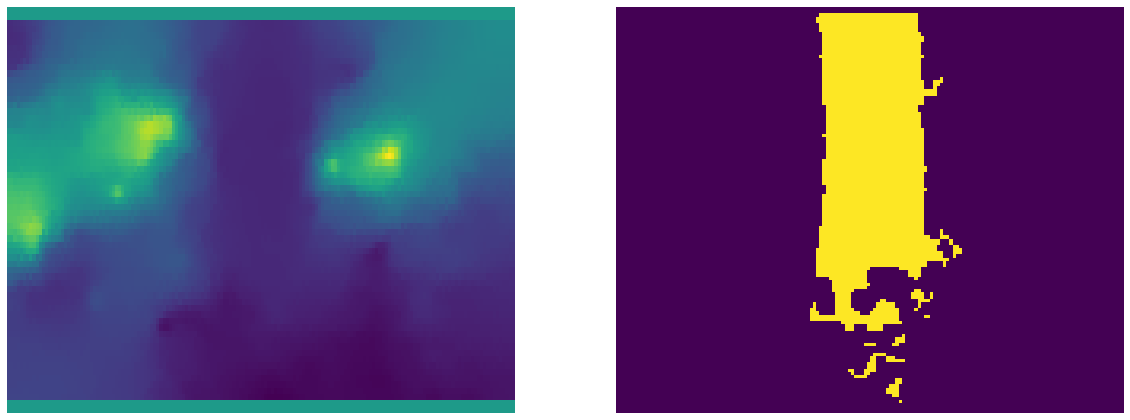

In [35]:
ncols = 2
nrows = 1

sample_n = 7

fig, axs = plt.subplots(
    nrows=1,
    ncols=ncols,
    figsize=(20, ncols * 4),
)

img = torch.squeeze(img)
axs[0].imshow(img[sample_n, :, :])
axs[0].axis("off")

msk = torch.squeeze(mask)
msk = msk[sample_n, :, :]
axs[1].imshow(msk)
axs[1].axis("off")

# plt.savefig("data/plots/correct_data.jpg")